In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
filepath = ('./Records/20210305_170238_rec.csv')

headers = ['Uptime(s)',
           'DateTime(s)', 'Ticks(ms)',
           'Status_a', 'Status_b',
           'uint32_b',
           'Temp(C)', 'uint16_b',
           'Accel_X', 'Accel_Y', 'Accel_Z', 'int8_d',
           'uint32_c',
           'uint32_d',
           'uint32_e',
           'uint32_f',
           'uint32_g',
           'uint32_h',
           'uint32_i']

temp_c_conv = 1/32.0
accel_g_est = 1/10.0

TelemetryData = pd.read_csv(filepath, index_col=False, names=headers)

In [3]:
TelemetryData.head()

,Uptime(s),DateTime(s),Ticks(ms),Status_a,Status_b,uint32_b,Temp(C),uint16_b,Accel_X,Accel_Y,Accel_Z,int8_d,uint32_c,uint32_d,uint32_e,uint32_f,uint32_g,uint32_h,uint32_i
0,158,3823981509,158005,63,0,0,829,0,-1,0,10,0,0,0,0,0,0,0,0
1,159,3823981510,159005,63,0,0,829,0,-1,0,10,0,0,0,0,0,0,0,0
2,160,3823981511,160005,63,0,0,829,0,0,0,10,0,0,0,0,0,0,0,0
3,161,3823981512,161005,63,0,0,829,0,-1,0,10,0,0,0,0,0,0,0,0
4,162,3823981513,162005,63,0,0,829,0,-1,0,10,0,0,0,0,0,0,0,0


In [4]:
TelemetryData.loc[:, 'DateTime(s)'] = pd.to_datetime(TelemetryData['DateTime(s)'], unit='s', origin=pd.Timestamp('1900-01-01'))

In [5]:
TelemetryData.head()

,Uptime(s),DateTime(s),Ticks(ms),Status_a,Status_b,uint32_b,Temp(C),uint16_b,Accel_X,Accel_Y,Accel_Z,int8_d,uint32_c,uint32_d,uint32_e,uint32_f,uint32_g,uint32_h,uint32_i
0,158,2021-03-06 01:05:09,158005,63,0,0,829,0,-1,0,10,0,0,0,0,0,0,0,0
1,159,2021-03-06 01:05:10,159005,63,0,0,829,0,-1,0,10,0,0,0,0,0,0,0,0
2,160,2021-03-06 01:05:11,160005,63,0,0,829,0,0,0,10,0,0,0,0,0,0,0,0
3,161,2021-03-06 01:05:12,161005,63,0,0,829,0,-1,0,10,0,0,0,0,0,0,0,0
4,162,2021-03-06 01:05:13,162005,63,0,0,829,0,-1,0,10,0,0,0,0,0,0,0,0


In [6]:
TelemetryData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404 entries, 0 to 403
Data columns (total 19 columns):
Uptime(s)      404 non-null int64
DateTime(s)    404 non-null datetime64[ns]
Ticks(ms)      404 non-null int64
Status_a       404 non-null int64
Status_b       404 non-null int64
uint32_b       404 non-null int64
Temp(C)        404 non-null int64
uint16_b       404 non-null int64
Accel_X        404 non-null int64
Accel_Y        404 non-null int64
Accel_Z        404 non-null int64
int8_d         404 non-null int64
uint32_c       404 non-null int64
uint32_d       404 non-null int64
uint32_e       404 non-null int64
uint32_f       404 non-null int64
uint32_g       404 non-null int64
uint32_h       404 non-null int64
uint32_i       404 non-null int64
dtypes: datetime64[ns](1), int64(18)
memory usage: 60.0 KB


In [7]:
TelemetryData.loc[:, 'Temp(C)'] = TelemetryData['Temp(C)']*temp_c_conv

Text(0, 0.5, 'Temperature (C)')

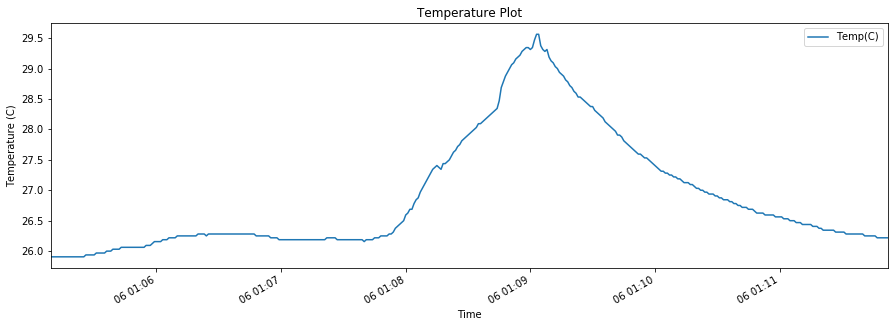

In [8]:
fig, axs = plt.subplots(1, 1, figsize=(15, 5))
TelemetryData[['Temp(C)', 'DateTime(s)']].plot(ax=axs, x='DateTime(s)', y='Temp(C)')
axs.set_title('Temperature Plot')
axs.set_xlabel('Time')
axs.set_ylabel('Temperature (C)')

In [9]:
TelemetryData.loc[:, 'Accel_X'] = TelemetryData['Accel_X']*accel_g_est
TelemetryData.loc[:, 'Accel_Y'] = TelemetryData['Accel_Y']*accel_g_est
TelemetryData.loc[:, 'Accel_Z'] = TelemetryData['Accel_Z']*accel_g_est

Text(0, 0.5, 'Accel_Z')

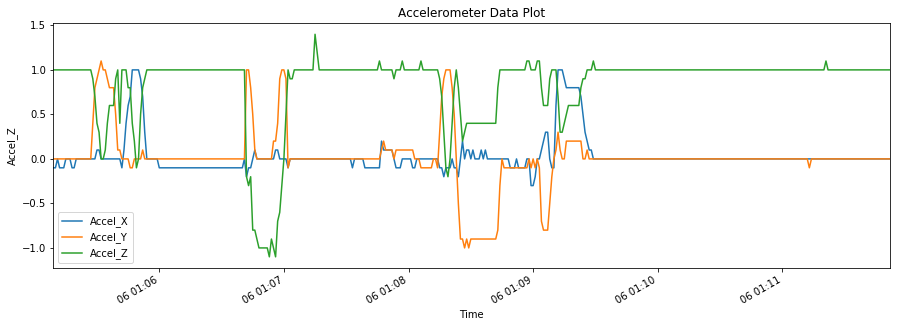

In [10]:
fig, axs = plt.subplots(1, 1, figsize=(15, 5))
TelemetryData[['Accel_X', 'DateTime(s)']].plot(ax=axs, x='DateTime(s)', y='Accel_X')
TelemetryData[['Accel_Y', 'DateTime(s)']].plot(ax=axs, x='DateTime(s)', y='Accel_Y')
TelemetryData[['Accel_Z', 'DateTime(s)']].plot(ax=axs, x='DateTime(s)', y='Accel_Z')
axs.set_title('Accelerometer Data Plot')
axs.set_xlabel('Time')
axs.set_ylabel('Accel_Z')